In [ ]:
import numpy as np
import tensorflow as tf
import keras

In [ ]:
import tensorflow.keras.applications.mobilenet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation, Dropout, Convolution2D ,GlobalAveragePooling2D
import os
import matplotlib.pyplot as plt
import random

In [ ]:
image_train_path = '/content/drive/MyDrive/new_data/train'

Str_to_Int = {
    "crop":0,
    "weed":1
}
NUM_CLASSES = 2

def int_mapper(val):
    return (Str_to_Int[val])

In [ ]:
import cv2
import PIL
dataset = []

In [ ]:
for directory in os.listdir(image_train_path):
    path = os.path.join(image_train_path,directory)
    for image in os.listdir(path):
        img = os.path.join(path,image)
        try:
            img_read = PIL.Image.open(img)
            img = img_read.convert('RGB')
            img = np.asarray(img)
            img = cv2.resize(img, (240,240))
            img = img/255
            dataset.append([img,directory])
        except PIL.UnidentifiedImageError:
            print("error skipped")
            print(img)

In [ ]:
data, labels = zip(*dataset)
temp = list(map(int_mapper,labels))
labels = keras.utils.to_categorical(temp)

In [ ]:
labels[0]

array([1., 0.], dtype=float32)

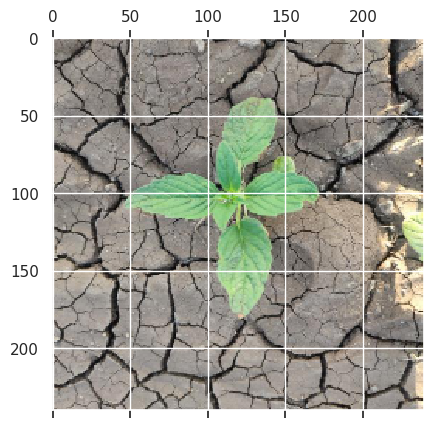

In [ ]:
plt.matshow(data[0])

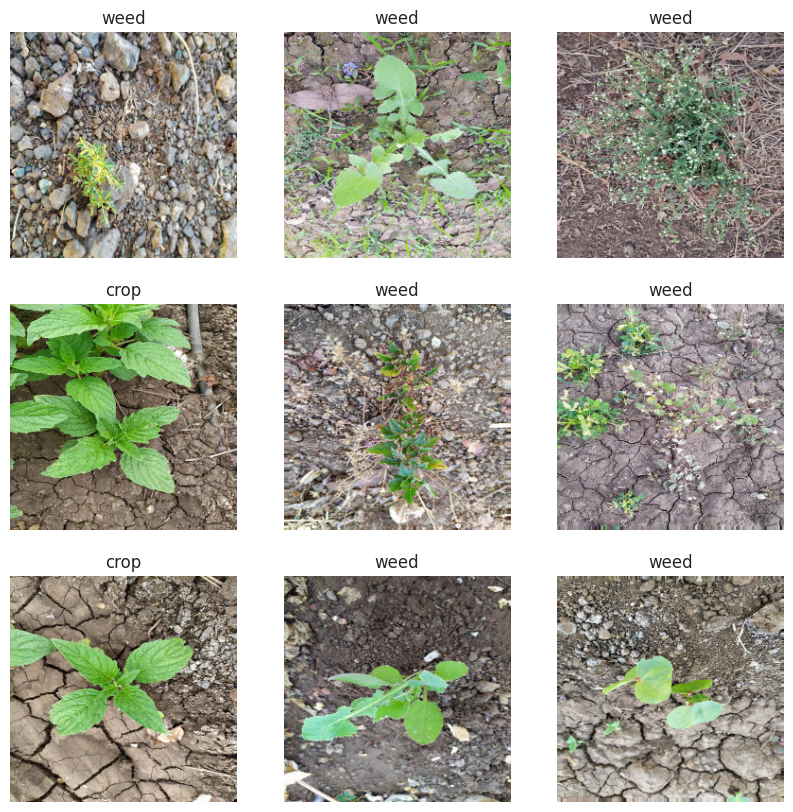

In [ ]:
# Select num_images random images from the testing_data array
indices = random.sample(range(len(data)), 9)
images = np.array(data)[indices]
label = np.array(labels)[indices]

# Create a grid of subplots with the specified dimensions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Plot each image with its corresponding label as the title
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    if label[i][0]==1:
        ax.set_title("crop")
    else:
        ax.set_title("weed")
    ax.axis('off')

# Display the plot
plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
from keras.applications import DenseNet121
from keras.layers import Dense, Flatten

In [ ]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(240,240,3)
)

In [ ]:
def build_densenet():
    model = Sequential()
    model.add(densenet)
    model.add(data_augmentation)
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Flatten())
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2,activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.0001),
        metrics=['accuracy']
    )

    return model

In [ ]:
model = build_densenet()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 sequential_2 (Sequential)   (None, 7, 7, 1024)        0         
                                                                 
 dense_5 (Dense)             (None, 7, 7, 64)          65600     
                                                                 
 dense_6 (Dense)             (None, 7, 7, 32)          2080      
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 16)                25104     
                                                                 
 dense_8 (Dense)             (None, 8)                

In [ ]:
history = model.fit(np.array(data),np.array(labels),epochs=100,shuffle=True,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 80s 3s/step - loss: 0.7517 - accuracy: 0.5714 - val_loss: 0.7162 - val_accuracy: 0.2000
Epoch 2/100
2/2 [==============================] - 1s 387ms/step - loss: 0.6628 - accuracy: 0.6250 - val_loss: 0.7194 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 1s 385ms/step - loss: 0.6628 - accuracy: 0.6071 - val_loss: 0.7189 - val_accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 1s 375ms/step - loss: 0.5799 - accuracy: 0.7500 - val_loss: 0.7205 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 1s 379ms/step - loss: 0.5900 - accuracy: 0.6964 - val_loss: 0.7254 - val_accuracy: 0.3333
Epoch 6/100
2/2 [==============================] - 1s 391ms/step - loss: 0.5504 - accuracy: 0.7143 - val_loss: 0.7334 - val_accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 1s 383ms/step - loss: 0.5905 - accuracy: 0.6607 - val_loss: 0.7447 - val_accuracy: 0.2000
Epoch 8/100
2/2

Epoch 50/50
2/2 [==============================] - 1s 172ms/step - loss: 0.2502 - accuracy: 0.9459 - val_loss: 0.9834 - val_accuracy: 0.5000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def plt_acc(history):
  sns.set()
  fig = plt.figure(0,(12,4))

  ax = plt.subplot(1,2,1)
  sns.lineplot(x=history.epoch,y=history.history['accuracy'],label='train')
  sns.lineplot(x=history.epoch,y=history.history['val_accuracy'],label='valid')
  plt.title('Accuracy')
  plt.tight_layout()

  ax = plt.subplot(1,2,2)
  sns.lineplot(x=history.epoch,y=history.history['loss'],label='train')
  sns.lineplot(x=history.epoch,y=history.history['val_loss'],label='valid')
  plt.title('loss')
  plt.tight_layout()

  plt.show()

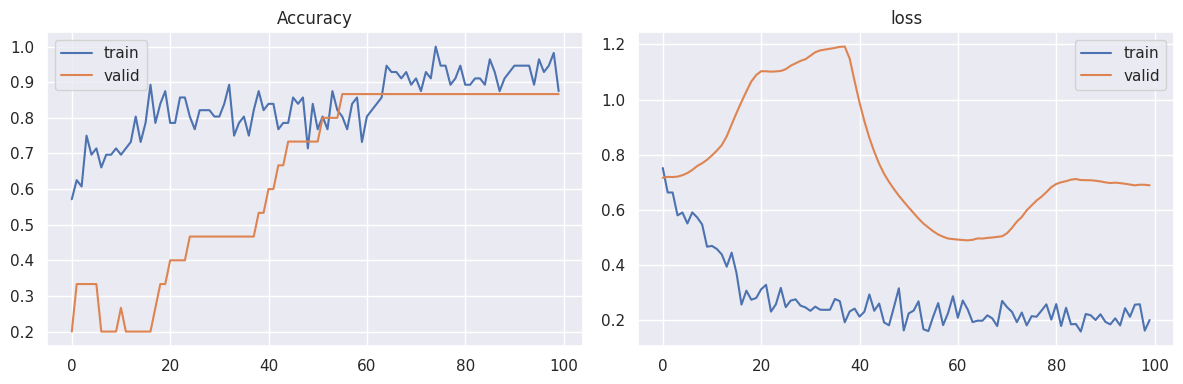

In [ ]:
plt_acc(history)

In [ ]:
image_test_path = '/content/drive/MyDrive/new_data/test'

In [ ]:
data_testing = []
for directory in os.listdir(image_test_path):
    path = os.path.join(image_test_path,directory)
    for image in os.listdir(path):
        img = os.path.join(path,image)
        try:
            img_read = PIL.Image.open(img)
            img = img_read.convert('RGB')
            img = np.asarray(img)
            img = cv2.resize(img, (240,240))
            img = img/255
            data_testing.append([img,directory])
        except PIL.UnidentifiedImageError:
            print("error skipped")

In [ ]:
testing_data, testing_labels = zip(*data_testing)
testing_temp = list(map(int_mapper,testing_labels))
testing_labels = keras.utils.to_categorical(testing_temp)

In [ ]:
model.evaluate(np.array(testing_data),np.array(testing_labels))

1/1 [==============================] - 0s 160ms/step - loss: 0.2655 - accuracy: 0.9667


[0.26546379923820496, 0.9666666388511658]

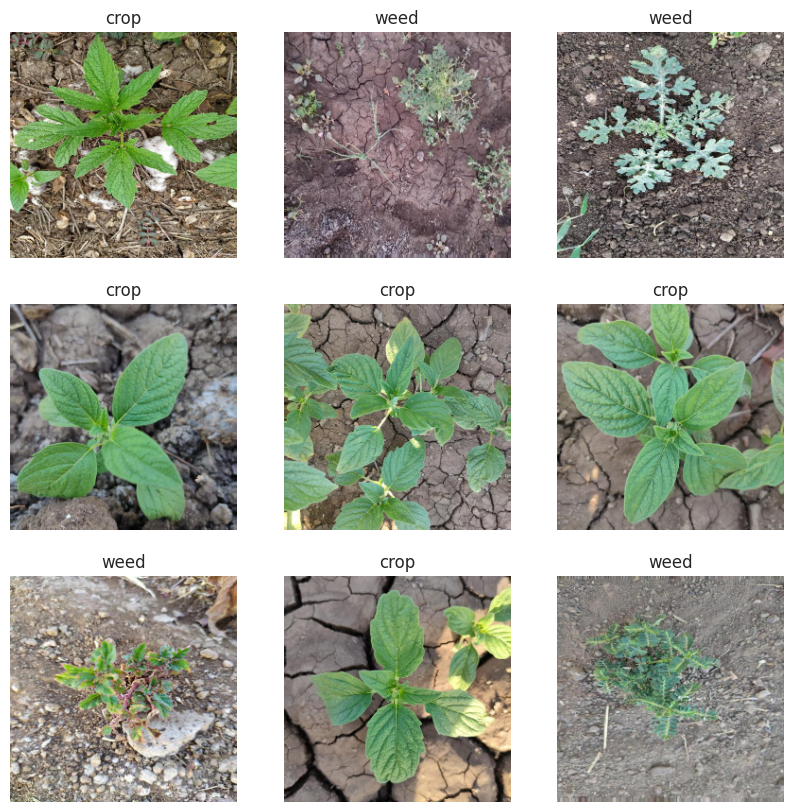

In [ ]:
# Select num_images random images from the testing_data array
indices = random.sample(range(len(testing_data)), 9)
images = np.array(testing_data)[indices]
label = np.array(testing_labels)[indices]

# Create a grid of subplots with the specified dimensions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Plot each image with its corresponding label as the title
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    if label[i][0]==0:
        ax.set_title("weed")
    else:
        ax.set_title("crop")
    ax.axis('off')

# Display the plot
plt.show()

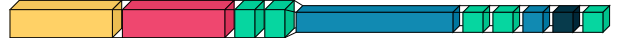

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 26.0 MB/s eta 0:00:00


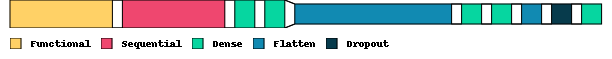

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False)

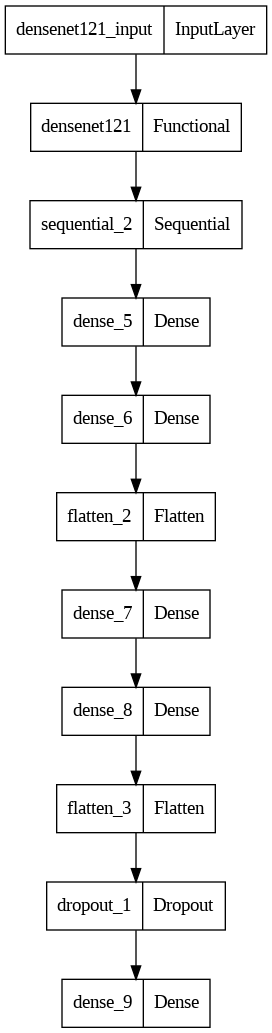

In [ ]:
keras.utils.vis_utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 sequential_2 (Sequential)   (None, 7, 7, 1024)        0         
                                                                 
 dense_5 (Dense)             (None, 7, 7, 64)          65600     
                                                                 
 dense_6 (Dense)             (None, 7, 7, 32)          2080      
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 16)                25104     
                                                                 
 dense_8 (Dense)             (None, 8)                

In [ ]:
1024*7*7